## MLP 模型 训练 XOR 数据
比较了不同的梯度算法训练模型的效率， 'sgd', 'adagrad', 'rmsprop'

中间隐藏层节点为 `2`时， 'sgd'表现最好

|hidden_num | loop | accu | best optimizer|
|-----------|:-----|-----:|---------------|
| 2         |   ?  |   ?  |'sgd'          |
|4          |100   | 1.0  |'adagrad', 'sgd'|

In [173]:
import numpy as np
from numpy.matlib import repmat
from keras.models import Sequential
from keras.layers import Dense
from jupyter_notebook.utils import data_iterator

In [174]:
def gen_data():
    x = np.asarray([[0., 0.], [0., 1.], [1., 0.], [1., 1.]], dtype=np.float)
    y = np.asarray([1., 0., 0., 1.], dtype=np.float)
    x = repmat(x, 100, 1)
    y = repmat(y, 100, 1)
    return x, y.flatten()


def build_model():
    model = Sequential()
    model.add(Dense(output_dim=2, input_dim=2, activation='tanh'))
    model.add(Dense(output_dim=2, activation='sigmoid'))
    return model

In [176]:
x, y = gen_data()
print 'data:: x.shape: {0}, y.shape: {1}'.format(x.shape, y.shape)
model = build_model()
print 'model:: input_shape: {0}, output_shape: {1}'.format(
    model.input_shape, model.output_shape)

data:: x.shape: (400, 2), y.shape: (400,)
model:: input_shape: (None, 2), output_shape: (None, 2)


In [177]:
#model.fit(x, y, nb_epoch=100, batch_size=20)
def train_model(model, data_it, num_batches=10, loop=10):
    loss_metrics = []
    for ii in range(loop):
        tmp_loss_metrics = []
        for jj in range(num_batches):
            batch_x, batch_y = data_it.next()
            batch_loss_metrics = model.train_on_batch(batch_x, batch_y)
            tmp_loss_metrics.append(batch_loss_metrics)
        tmp_loss_metrics = np.mean(np.asarray(tmp_loss_metrics), axis=0)
        loss_metrics.append(tmp_loss_metrics)
    return loss_metrics

In [178]:
num_batches = 50
batch_size = 32
loop = 100
data_it = data_iterator.ComplexIterator([x, y], batch_size, shuffle=True, seed=123)
model_0 = build_model()
model_0.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_1 = build_model()
model_1.compile(loss='sparse_categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
model_2 = build_model()
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
loss_metrics_0 = train_model(model_0, data_it, loop=loop)
loss_metrics_1 = train_model(model_1, data_it, loop=loop)
loss_metrics_2 = train_model(model_2, data_it, loop=loop)

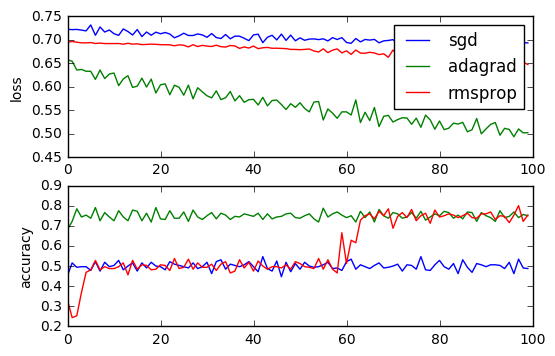

In [179]:
import matplotlib.pyplot as plt
loss_0 = [m[0] for m in loss_metrics_0]
metrics_0 = [m[1] for m in loss_metrics_0]
loss_1 = [m[0] for m in loss_metrics_1]
metrics_1 = [m[1] for m in loss_metrics_1]
loss_2 = [m[0] for m in loss_metrics_2]
metrics_2 = [m[1] for m in loss_metrics_2]
plt.figure()
plt.subplot(211)
plt.plot(loss_0, 'b', label='sgd')
plt.plot(loss_1, 'g', label='adagrad')
plt.plot(loss_2, 'r', label='rmsprop')
plt.legend()
plt.ylabel('loss')
plt.subplot(212)
plt.plot(metrics_0, 'b')
plt.plot(metrics_1, 'g')
plt.plot(metrics_2, 'r')
plt.ylabel('accuracy')
plt.show()

In [160]:
model_1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_133 (Dense)                (None, 2)             6           dense_input_67[0][0]             
____________________________________________________________________________________________________
dense_134 (Dense)                (None, 2)             6           dense_133[0][0]                  
Total params: 12
____________________________________________________________________________________________________
